# Notebook E-tivity 3 CE4021 Task 1

**Student name:** Jason Coleman

**Student ID:** 9539719

## Imports

In [21]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

# Task 1: Option Dice

Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

* Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.

* Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

* The expected value of your random variable.

* The standard deviation of your random variable.

* Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

**N.B.:**

* Structure your notebook as follows:
    1. Markdown cell with problem description
    2. Markdown cells with expected value and standard deviation of your random variable
    3. Cell(s) with experiment
    4. Cell(s) with outputs and graphs
    5. Commentary comparing calculated values to experimentally obtained values.

* You may only use the following modules:
    * Random
    * Numpy
    * A visualisation module such as Matplotlib
    * Math

* You are not required to perform exception handling.
* You are not required to provide tests for your code.

# Solution

## Calculating P(X), E[X] and std-dev
When rolling 2d6, each die has 6 possible outcomes: {1, 2, 3, 4, 5, 6}. The sample space for rolling two such dice is the set of all possible ordered pairs of outcomes, one from the first die and one from the second die.

There are a total of $6 \times 6 = 36$ possible ordered pairs in the total sample space.

$$
S = \{ (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), \\
    (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), \\
    (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), \\
    (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), \\
    (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), \\
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6) \}
$$

But we will only we working with a subset due to the filtering (i.e. $X \lt 3$ or $X \gt 10$).

**Goal:** Determining the probability that the sum of the two dice is less than 3 or more than 10
$$
P(X \lt 3 | X \gt 10)
$$

#### Probability (when we filter the rolls)
The subset of ordered pairs, known as the possible outcomes, that sum to $> 10$ or $< 3$ are:

$$
S' = \{ (1, 1), (5, 6), (6, 5), (6, 6) \}
$$


To find the probability of rolling an ordered pair that belongs to the subset $S'$, we divide the number of desired outcomes by the total number of possible outcomes when rolling two six-sided dice. 

The probability of rolling one of the desired outcomes, $P(S')$ is:

$$
P(S') = \frac{\text{No. of desired outcomes}}{\text{Total Number of Outcomes}}
$$

$$
P(S') = \frac{4}{36} = \frac{1}{9} \approx \boxed{0.11}
$$

 Another way to look at this is:

* Rolling less than 3, rolling a (1,1):


$$
\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} = \boxed{0.0278}
$$


* Rolling greater than 10: rolling (5,6), (6,5), (6,6)


$$
(\frac{1}{6} \times \frac{1}{6}) = \frac{1}{36}
$$

$$
(\frac{1}{6} \times \frac{1}{6}) + (\frac{1}{6} \times \frac{1}{6}) = \frac{1}{18}
$$

$$
=> \frac{1}{36} + \frac{1}{18} = \frac{1}{12} = \boxed{0.0834}
$$

* Probability of rolling a desired outcome is:


$$
0.0278 + 0.0834 \approx  \boxed{0.1112}
$$

#### Summary

| Dice Roll       | Description      | Probability   | Probability |
|-----------------|-----------------|---------------|-------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 1/36 | 0.0278      |

Probability of rolling a desired outcome is $\approx  \boxed{0.1112}$.

### Expected Value, E[X]

The expected value (or mean) of a discrete random variable is a measure of the center of the distribution of the variable. It provides a weighted average of the possible outcomes of the random variable.

If we assume we are measuring the success then the EV of a Bernoulli distribution is just the probability of success. The Expected Value for the filtered outcomes (a subset of all 36 possible outcomes):

$$
S' = \{ (1, 1), (5, 6), (6, 5), (6, 6) \}
$$

$$E[X] = \sum \text{outcomes} \cdot p(\text{outcomes})$$

I sum the outcomes and multiply by the p(x); where each outcome has a 1/4 probability in the filtered set.

$$E[X] = (2 \times 0.25) + (11 \times 0.25) + (11 \times 0.25) + (12 \times 0.25)$$

$$\boxed{E[X] = 9}$$

### Variance (of the filtered outcomes)

Given outcomes: 

$$
S' = \{ 2, 11, 11, 12 \}
$$


Probabilities for each outcome:

$$
p(x_i) = 0.25
$$

Then,

$$
E[X^2] = \sum x_i^2 \cdot p(x_i)
$$

And,

$$
= 2^2 \cdot 0.25 + 11^2 \cdot 0.25 + 11^2 \cdot 0.25 + 12^2 \cdot 0.25
$$

Which reduces to:

$$
= 1 + 30.25 + 30.25 + 36
$$

So,

$$
E[X^2] = 97.5
$$

Finally, compute the variance:

$$
\text{Var}(X) = E[X^2] - [E[X]]^2
$$

And, from above, our earlier calculation we know that

$$
E[X] = 9
$$

So, filling in for $E[X]$:


$$
\text{Var}(X) = 97.5 - 9^2
$$

Which equals:

$$
\text{Var}(X) = 97.5 - 81 = 16.5
$$

### Standard Deviation (of the filtered outcomes)


$$
\sigma = \sqrt{\text{Var}(X) }
$$

$$
\boxed{\sigma = 4.06202}
$$


#### Mathematical Summary

* At face value, the distribution of 2d6, filtering out X<2 or X>10 is non-uniform. The distribution for 2d6 is not normal but tends towards triangular.
* Depending on how we phrase this, this "game" could be termed a `Bernoulli Trial` since we are measuring success (sum < 3 or > 10) or failuref so, then the  distribution is `Binomial`.
* Random Variables, $X$ are numerical values that are assigned to an outcome of an event. We can calculate the probability of the random variable having a particular value ($P(X)$).
* Our random variables are discrete and countable.
* The possible outcomes are, $\boxed{S' = \{ 2, 11, 11, 12 \}}$
* The probability of rolling one of the desired outcomes is $\boxed{0.1112}$
* The Expected Value is: $\boxed{9}$
* The standard deviation, $\sigma$: $\boxed{4.06202}$

## Python Implementation
The approach I'll take will rely on rolling lots of 2d6 and measuring when the sums of the dice match our conditions. I will want to see if the number of trials I do, impacts how well I match the previous paper-based calculations. 

When I write this code, I'm not really thinking about the type of distributions; I just want to run the experiments to see the shapes I get. I can then match it to the theory above.

In [22]:
def roll_2d6() -> int:
    """
    Simple function to roll 2d6 and return the sum of the two dice.

    :return: A sum of random variables representing the event, rolling 
             a dice (Sum of a single 2d6 dice roll).
    """

    return random.randint(1,6) + random.randint(1,6)

In [23]:
def experiment_roll2d6(num_trials: int, 
               keep_condition = lambda x: x <= 12) -> list[int]:
    """ 
    Run a simulation of rolling 2d6 num_trials times and return a list of the results.

    :param num_trials: Number of times to run the experiment (effectively controls the sample size).
    :param keep_condition: A filtering function that runs on the random variable, X (representing 
                      the sum of the 2d6 roll) and returns a boolean if the conditions are met. 
                      This allows me to filter the results. The default condition is to allow all sums.

    :return: List of 2d6 rolls from the simulation (a distribition of the random variable).
    """

    results = []

    # Roll 2d6 n times, so we get a good sample 
    for i in range(num_trials):
        x_sum_2d6 = roll_2d6()

        # record the sum ONLY if the condition is met
        if keep_condition(x_sum_2d6):
            results.append(x_sum_2d6)

    return results

In [24]:
def summarise_experiment(sums: list[int], throws: int) -> None:
    """
    Generic summary function - descriptive stats and plots (PMF and CDF)

    :param sums: list of sums of two 6-sided dice
    :param throws: number of throws of the pairs of dice
    :return: None
    """
 
    sum_counts = {i: sums.count(i) for i in set(sums)}
    print("\nSum\tCount\tProbability")
    for sum_val in sorted(sum_counts.keys()):
        probability = sum_counts[sum_val] / throws
        print(f"{sum_val}\t{sum_counts[sum_val]}\t{probability:.4f}")

    #sum probabilities in sum_counts
    sum_probabilities = sum(sum_counts.values())
    print(f"The probability of rolling a sum that matches the condition is: {sum_probabilities/throws:.4f}")

    # Calculating expected value and standard deviation
    expected_value = np.mean(sums)
    std_dev = np.std(sums)

    print(f"Expected Value (mean) of the sums: {expected_value:.2f}")
    print(f"Standard Deviation of the sums: {std_dev:.2f}")

    # Plotting the Probability Mass Function (PMF)
    plt.hist(sums, bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
             align='left', rwidth=0.8, density=True)
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.axvline(expected_value-std_dev, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(expected_value+std_dev, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(expected_value, color='r', linestyle='dashed', linewidth=1)
    plt.title(f"PMF (sum of two 6-sided dice for {format(throws, ',')} throws)")
    plt.xticks(list(range(2, 13)))
    plt.legend(["- std-dev", "+ std-dev", "Expected Value"])
    plt.show()

    #plot the Cumulative distribution function (CDF)
    plt.hist(sums, bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
             align='left', rwidth=0.8, density=True, cumulative=True)
    plt.xlabel("Outcome")
    plt.ylabel("Probability")
    plt.title(f"CDF (sum of two 6-sided dice for {format(throws, ',')}  throws)")
    plt.xticks(list(range(2, 13)))
    plt.show()

The distribution, if we accepts all throws of the dice, is a nice normal distribution and the CDF is a more ike an s-curve. 

#### Roll 100 throws of 2d6 - Filtering based on Sum value


Sum	Count	Probability
2	3	0.0300
11	13	0.1300
12	4	0.0400
The probability of rolling a sum that matches the condition is: 0.2000
Expected Value (mean) of the sums: 9.85
Standard Deviation of the sums: 3.32


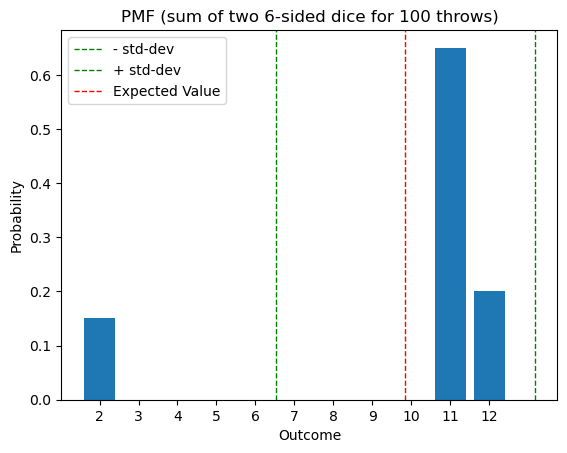

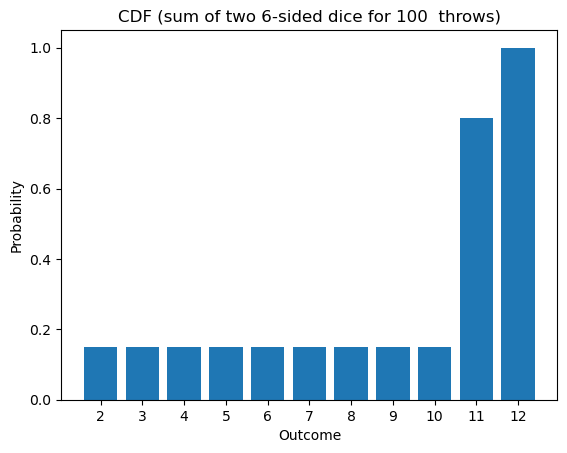

In [25]:
# Only count throws of the dice when the sum is less than 3 or greater than 10
condition_less_than_3_or_greater_than_10 = lambda x: x < 3 or x > 10 

num_trials = 100
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)

The distribution is non-uniform.

#### Roll 1000 throws of 2d6 - Filtering based on Sum value


Sum	Count	Probability
2	27	0.0270
11	47	0.0470
12	31	0.0310
The probability of rolling a sum that matches the condition is: 0.1050
Expected Value (mean) of the sums: 8.98
Standard Deviation of the sums: 4.13


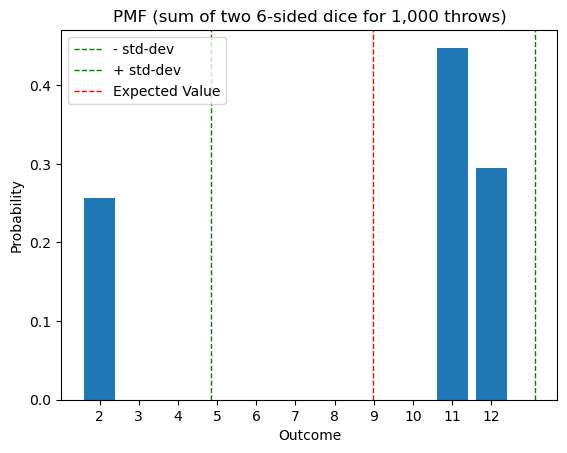

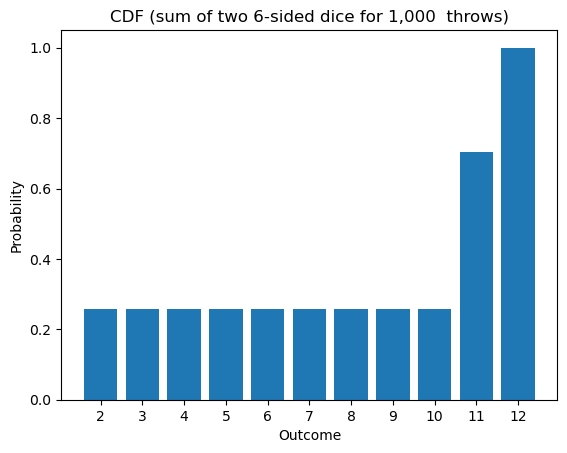

In [26]:
num_trials = 1_000
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)

Note how, for a low sample size increases, the actual $E(X)$ approaches (but is not quite at) the expected $E(X)$ that was calculated in the background section. The distribution is non-uniform.

$$
\boxed{\approx 0.118}
$$

#### Roll 10,000,000 throws of 2d6 - Filtering based on Sum value

We can see that increasing the sample size matches the expected probabilities.


Sum	Count	Probability
2	278426	0.0278
11	555887	0.0556
12	278062	0.0278
The probability of rolling a sum that matches the condition is: 0.1112
Expected Value (mean) of the sums: 9.00
Standard Deviation of the sums: 4.06


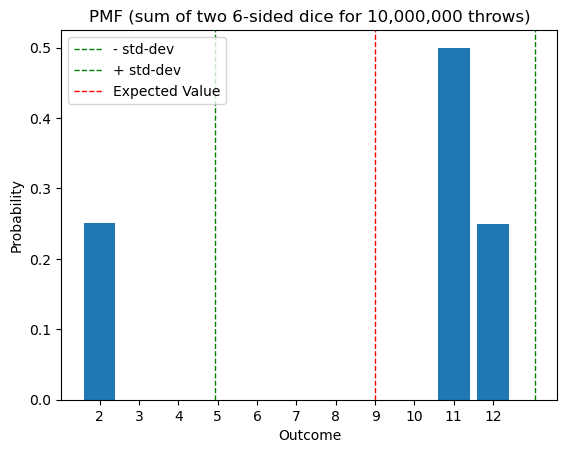

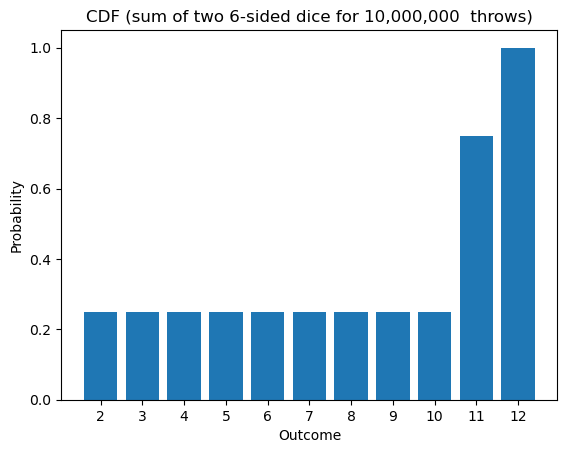

In [27]:
condition_less_than_3_or_greater_than_10 = lambda x: x < 3 or x > 10 

num_trials = 10_000_000
sums = experiment_roll2d6(num_trials, condition_less_than_3_or_greater_than_10)
summarise_experiment(sums, num_trials)

This is much better. Note how, as the sample size increases, the actual approaches the expected that was calculated in the background section. The distribution is non-uniform.


$$
\boxed{\approx 0.111}
$$

It is only now that the experimental approach starts to match the theoretical appproach.

This is more like what we expect. The distribution is non-uniform, binomial and more like a triangle than a bell-shape.

## Reflection

#### Summary:

* The sum of two dice is represented by a discrete random variable which in turn represents the sum of two random variables (each dice roll numerical result is its own random variable).
* The probability distribution is unique to the process of summing two dice, with a  filtering condition and doesn't quite fit the standard definitions of uniform,  or normal distributions (for two dice - we can approach a normal dist if we vastly increase the number of iterations - see [here](https://mathworld.wolfram.com/Dice.html)).
* The bigger the sample size, the more the actual probabilities tends to approach the expected probabilities.

TODO....

## References:
* https://www.youtube.com/watch?v=YXLVjCKVP7U&ab_channel=zedstatistics - PMF, CDF
* https://youtu.be/YXLVjCKVP7U?t=397 Probaility vs. Outcome
* [mbmlbook](https://mbmlbook.com/MurderMystery.html#concept_def_random_variable)
* [Brilliant Random Variable course](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)
* [Dice, Mathworld](https://mathworld.wolfram.com/Dice.html)
* [Playing Craps](https://mathworld.wolfram.com/Craps.html)

## Appendix

### Definitions

**Random Variable, X**
*"A random variable, $X$ assigns a numerical value to each outcome of a chance event. Random variables are not the same as the event they quantify"* (see [Brilliant](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)). In our case, each dice roll result is a Random Variable and the sum of the dice rolls is also a Random variable (a compound one).


**Sample Space, S**
This is the set of all possible outcomes for an event.

**Type of Random Variable:**
The sum of the two dice represents a single  `discrete random` variable as the dice roll can only lead to positive integers in the range 2-12. 

**Probability Distribution:**
The probability distribution shows the likelihood for each possible value. In some ways, the question determines the distribution.

*Notes:* I will use $nd6$ to represent the sum of n d6-sided dice (e.g. 1d6, 2d6).

* **Rolling 1d6** - The distribution for a perfectly balanced, single dice roll is `uniform`. Each result is equally likely (i.e. $\frac{1}{6}$ chance). For this assignment, we are not interested in just 1d6.
* **Rolling 2d6** - while the distribution of a fair 1d6 is uniform, the distribution for the sum of two die rolls is `non-uniform` (since there are different chances assigned to getting each sum).
* **Rolling 2d6 whilst measuring success and failure** - there are two outcomes: success or failure. In this case, the distribution for the sum of two die rolls is `non-uniform`. We could consider this a `Bernoulli Trial` since we are measuring success (where sum < 3 or > 10) or failure. 

## The Game
It seems like the approach we take depends on how we phrase the problem. You could say that this task relates to a very simple dice game. 

* The player has two six-sided dice
* You `win` the round if you roll:

| Dice Roll       | Description      | 
|-----------------|-----------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 


* Else, you `lose`.

So, what is the probability of winning the game? 

### Experiment 0 - What happens if we don't filter the 2d6 sum?
**Note:** The following is not required but I'd like to plot the distribution if we don't filter based on the sum of the 2d6 roll. That is, I'd like to examine what happens if I impose zero conditions on the rolls. What happens if we roll 2d6 and accept all sums (from the total space of 36 outcomes)? 

Show the PMF and CDF. 

Again, I will do two passes. The first pass will do 10 trials and the second will do 10000. The intent is to show the impact of sample size on distribution.

Note, the `experiment_roll2d6` has default conditions that will sum all options in the set of outcomes.

#### Run 10 experiments


Sum	Count	Probability
3	1	0.1000
4	1	0.1000
6	1	0.1000
7	1	0.1000
8	2	0.2000
9	3	0.3000
10	1	0.1000
The probability of rolling a sum that matches the condition is: 1.0000
Expected Value (mean) of the sums: 7.30
Standard Deviation of the sums: 2.19


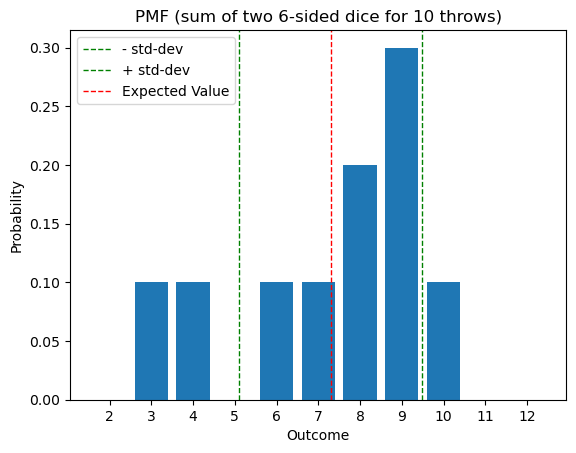

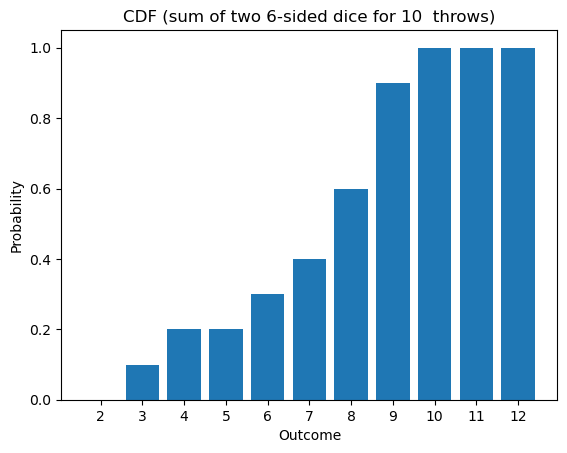

In [28]:
num_trials = 10
sums = experiment_roll2d6(num_trials)
summarise_experiment(sums, num_trials)

Note how the sample size impacts the plots and the descriptive statistics. The distribution is non-uniform and `Binomial`.

Let's increase the number of dice throws, i.e. use a bigger sample (or throw way more pairs of dice) and see how this impacts the Expected Value, std-dev and PMF/CDF plots.

#### Run 10,000 experiments


Sum	Count	Probability
2	304	0.0304
3	541	0.0541
4	858	0.0858
5	1112	0.1112
6	1387	0.1387
7	1667	0.1667
8	1389	0.1389
9	1093	0.1093
10	842	0.0842
11	545	0.0545
12	262	0.0262
The probability of rolling a sum that matches the condition is: 1.0000
Expected Value (mean) of the sums: 6.97
Standard Deviation of the sums: 2.42


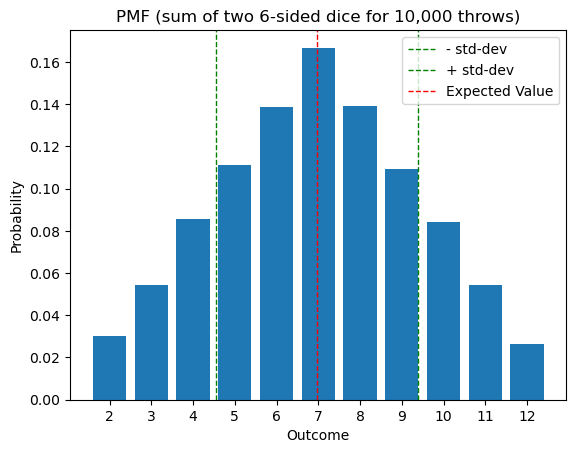

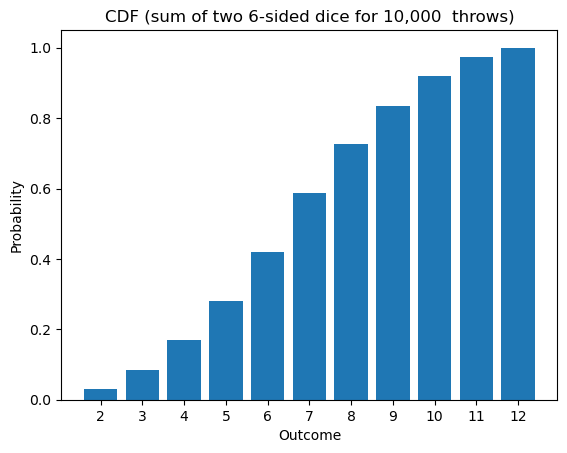

In [29]:
num_trials = 10_000
sums = experiment_roll2d6(num_trials )
summarise_experiment(sums, num_trials)